In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from analysis import bender_class
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [69]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.0, style='white')

In [70]:
# Specify the curve fit type, 1 for linear, 2 for quadratic.  
degree = 2

In [71]:
DS1 = os.path.join(path_to_repository , "CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv") # 0.02 in x 0.02 in cross-section
DS2 = os.path.join(path_to_repository , "CSV Data/6_6_25/2.1_static_v3_silpoxy_0.03_6_6_25.csv") # 0.03 in x 0.03 in cross-section
DS3 = os.path.join(path_to_repository , "CSV Data/6_4_25/2.1_static_v2_silpoxy_0.04_6_4_25.csv") # 0.04 in x 0.04 in cross-section

# Recovering Original Sensor Voltage from MCP3421 ADC Readings 
# This is done to compare data to theoretical model
# Theoretical model discussed on Github Page
---

The MCP3421 is a delta-sigma **differential ADC** that measures the difference between `IN+` and `IN−`.

In this setup:

- `IN+` is the **amplified voltage across the strain gauge** (via the OPA333).
$$
\text{Amplified Sensor Voltage} =  \text{Original Sensor Voltage} \times \text{Gain}
$$
  
- `IN−` is tied to **2.048 V** (a precision voltage reference).
- The ADC therefore measures:  
  $$
  V_{\text{diff}} = V_{IN+} - V_{IN−} = \text{Amplified Sensor Voltage} - 2.048\,\text{V}
  $$

---

## MCP3421 Voltage Range at PGA = 2 and 16-bit Resolution

The MCP3421’s differential input range depends on the **PGA (Programmable Gain Amplifier)** setting:

$$
V_{\text{diff}} \in \left[ -\frac{2.048\,\text{V}}{\text{PGA}}, +\frac{2.048\,\text{V}}{\text{PGA}} \right]
$$

For **PGA = 2**, the differential input range is:

$$
\pm \left( \frac{2.048}{2} \right) = \pm 1.024\,\text{V}
$$

This gives a **total input span of 2.048 V**.

---

## LSB (Least Significant Bit)

With **16-bit resolution** (65,536 levels) and PGA = 2:

$$
\text{LSB} = \frac{2.048\,\text{V}}{2^{16}} = 31.25\,\mu\text{V}
$$

---

## Recovering Original (Unamplified) Sensor Voltage

To retrieve the original (pre-gain) sensor voltage from the raw ADC reading and before the differential calculation:

$$
V_{\text{sensor}} = \frac{\text{ADC Code} \times \text{LSB} + \text{2.048V}}{\text{Gain}}
$$


##  thick (inches) = sample thickness + total bend radius (see Github page for complete detailed description)
## l_ch (inches) = liquid channel total length
## l_sam (inches) = sample length
## area (in^2) =  liquid channel square cross-section
- values for square cross-section adjusted to make sure model best fits data.   Optical microscope images and literature reflect channel shrinkage / collapse
## res (ohms) = starting electrical resistance measured by hand-held multimeter

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv']
ADC normalized with initial value R₀: 0.001814192238267148
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_6_25/2.1_static_v3_silpoxy_0.03_6_6_25.csv']
ADC normalized with initial value R₀: 0.00243587577962578
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_4_25/2.1_static_v2_silpoxy_0.04_6_4_25.csv']
ADC normalized with initial value R₀: 0.0020125977737665466


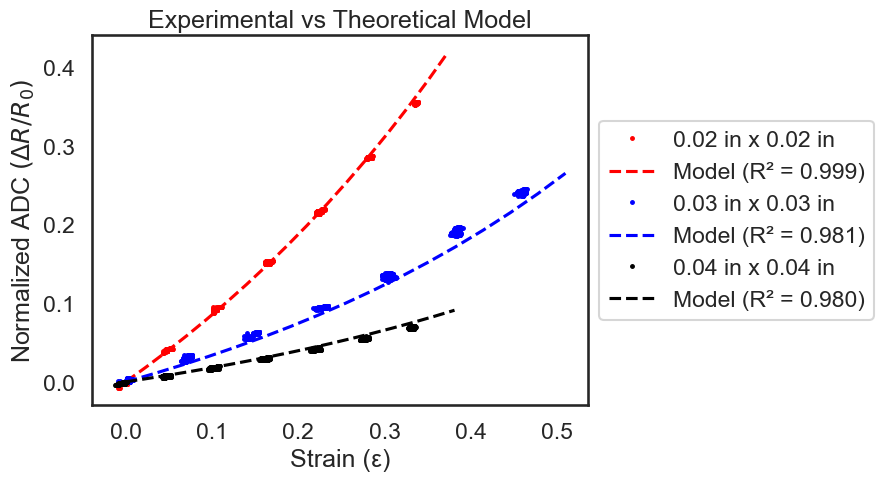

In [74]:
# 0.02 in x 0.02 in cross-section model and dataset

g = bender_class()
g.load_data(DS1)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16) [ volts /bit ]
Gain = 831 # Opamp Gain
# convert amplified adc value to un-amplified voltage so can compare to theoretical model
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain 
g.normalize_adc_over_R0()  


thick = 0.115 + 0.25 + 0.125
l_ch = 3.89 
l_sam = 2.1 
area = 0.017*0.017 
res = 0.4 

# Create a figure and axes before plotting
fig, ax = plt.subplots()  # This explicitly creates the `ax` object

# Create a figure and axes before plotting
# Below method plots theoretical model
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='red', 
                            model_color='red', data_label='0.02 in x 0.02 in', 
                       model_label='Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet



# 0.03 in x 0.03 in cross-section model and dataset

g = bender_class()
g.load_data(DS2)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 481 # Gain lowered here to prevent clipping of ADC values. Starting resistance likely higher than 0.4 ohms as reported in excel sheet but less than 0.5 ohms.  
#Multimeter does not have that resolution.  
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_over_R0()  


thick = 0.23 + 0.25 + 0.125
l_ch = 3.89
l_sam = 1.9
area = 0.027*0.027
res = 0.4



# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='blue', 
                            model_color='blue', data_label='0.03 in x 0.03 in', 
                       model_label='Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet



# 0.04 in x 0.04 in cross-section model and dataset

g = bender_class()
g.load_data(DS3)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 831
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_over_R0()  


thick = 0.125 + 0.25 + 0.125
l_ch = 3.89
l_sam = 2.1
area = 0.037*0.037 
res = 0.4



# Create a figure and axes before plotting
g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='black', 
                            model_color='black', data_label='0.04 in x 0.04 in', 
                       model_label='Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet



# Save before showing
plt.savefig("R v strain.png", dpi=300, bbox_inches='tight')  # .png, .jpg, .pdf, etc.



['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv']
ADC normalized with initial value R₀: 0.001814192238267148
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_6_25/2.1_static_v3_silpoxy_0.03_6_6_25.csv']
ADC normalized with initial value R₀: 0.00243587577962578
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_4_25/2.1_static_v2_silpoxy_0.04_6_4_25.csv']
ADC normalized with initial value R₀: 0.0020125977737665466


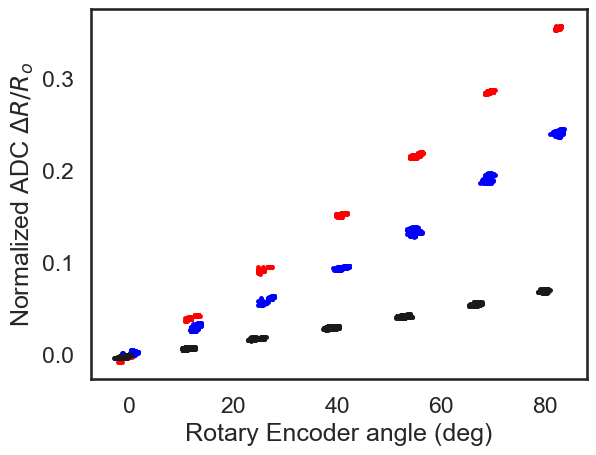

In [75]:
g = bender_class()
g.load_data(DS1)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16) [ volts /bit ]
Gain = 831 # Opamp Gain
# convert amplified adc value to un-amplified voltage so can compare to theoretical model
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain 
g.normalize_adc_over_R0()

fig, ax = plt.subplots()

# First plot
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], color='red', linestyle='none', marker='.', markersize=5, label='0.02 in x 0.02 in')

g = bender_class()
g.load_data(DS2)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 481 # Gain lowered here to prevent clipping of ADC values. Starting resistance likely higher than 0.4 ohms as reported in excel sheet but less than 0.5 ohms.  
#Multimeter does not have that resolution.  
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_over_R0()

# Second plot — skip method entirely, plot directly
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], color = 'blue', linestyle='none', marker='.', markersize=5, label='0.03 in x 0.03 in')

g = bender_class()
g.load_data(DS3)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 831
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_over_R0()

# Third plot — skip method entirely, plot directly
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], 'k.', markersize=5, label='0.04 in x 0.04 in')

ax.set_xlabel('Rotary Encoder angle (deg)')
ax.set_ylabel(r'Normalized ADC $\Delta R / R_o$')

# Save before showing
plt.savefig("R v angle.png", dpi=300, bbox_inches='tight')  # .png, .jpg, .pdf, etc.
plt.show()





['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_6_25/2.1_static_v3_silpoxy_0.03_6_6_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/6_4_25/2.1_static_v2_silpoxy_0.04_6_4_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0


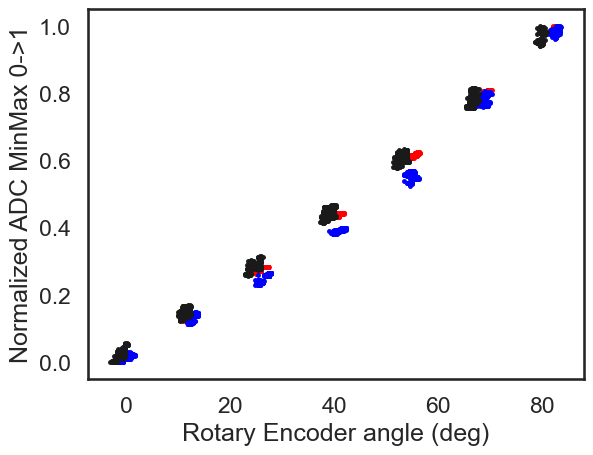

In [76]:
g = bender_class()
g.load_data(DS1)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16) [ volts /bit ]
Gain = 831 # Opamp Gain
# convert amplified adc value to un-amplified voltage so can compare to theoretical model
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain 
g.normalize_adc_bw_01()

fig, ax = plt.subplots()

# First plot
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], color='red', linestyle='none', marker='.', markersize=5, label='0.02 in x 0.02 in')

g = bender_class()
g.load_data(DS2)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 481 # Gain lowered here to prevent clipping of ADC values. Starting resistance likely higher than 0.4 ohms as reported in excel sheet but less than 0.5 ohms.  
#Multimeter does not have that resolution.  
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_bw_01()

# Second plot — skip method entirely, plot directly
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], color = 'blue', linestyle='none', marker='.', markersize=5, label='0.03 in x 0.03 in')

g = bender_class()
g.load_data(DS3)
LSB = 31.25*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 831
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/Gain
g.normalize_adc_bw_01()

# Third plot — skip method entirely, plot directly
ax.plot(g.data['Rotary Encoder'], g.data['ADC Value'], 'k.', markersize=5, label='0.04 in x 0.04 in')

ax.set_xlabel('Rotary Encoder angle (deg)')
ax.set_ylabel(r'Normalized ADC MinMax 0->1')

plt.savefig("01 v angle.png", dpi=300, bbox_inches='tight')  # .png, .jpg, .pdf, etc.
plt.show()




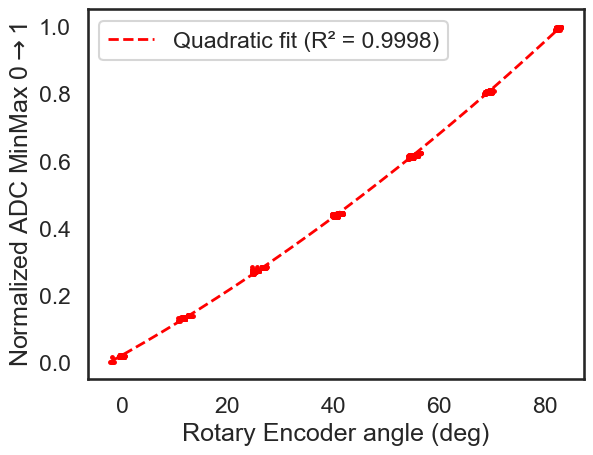

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Extract data (and drop NaNs just in case)
x = g.data['Rotary Encoder'].to_numpy()
y = g.data['ADC Value'].to_numpy()

# Quadratic fit: y ≈ a*x^2 + b*x + c
p = np.polyfit(x, y, 2)             # [a, b, c]
y_pred = np.polyval(p, x)
r2 = r2_score(y, y_pred)

# Smooth curve for plotting
xs = np.linspace(x.min(), x.max(), 400)
ys = np.polyval(p, xs)

# Plot
fig, ax = plt.subplots()

# Scatter (plain red dots, no connecting lines)
ax.plot(x, y, color='red', linestyle='none', marker='.', markersize=5)

# Quadratic curve
ax.plot(xs, ys, '--', color='red', linewidth=2, label=f'Quadratic fit (R² = {r2:.4f})')

ax.set_xlabel('Rotary Encoder angle (deg)')
ax.set_ylabel(r'Normalized ADC MinMax 0$\rightarrow$1')
ax.legend()

fig.savefig("raw_plot_min_angle_100perc.png", dpi=300, bbox_inches='tight')
plt.show()


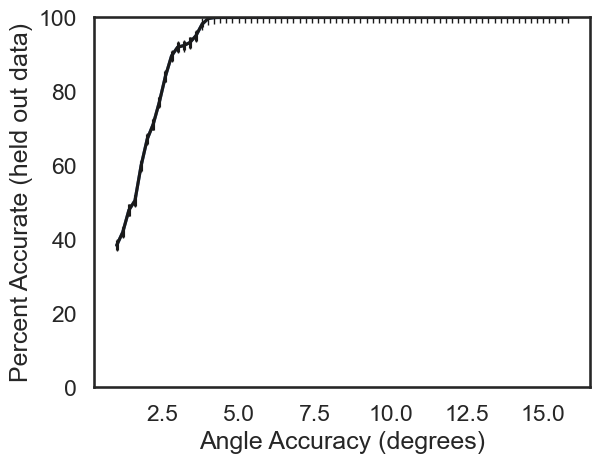

In [116]:
g.train_model_test_accuracy()
g.plot_accuracy()
# Get the current figure object
fig = plt.gcf()
fig.savefig("min_angle_for_100_acc.png", dpi=300, bbox_inches='tight')